## Project Overview

The goal of this project is to develop a comprehensive understanding of the Home Loan dataset through an in-depth exploratory data analysis (EDA). By examining the data, we aim to uncover underlying structures, patterns, and relationships that can provide meaningful insights into factors influencing loan outcomes.

This analysis involves systematic data cleaning, visualization, and statistical exploration to ensure data quality and extract key trends. The project leverages powerful Python libraries such as Pandas, Seaborn, Matplotlib, SciPy, and Statsmodels to perform data manipulation, visualization, and inferential statistical analysis.

### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

## Data Ingestion

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/dekpo23/Practice_datasets/refs/heads/main/home_loan_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/dekpo23/Practice_datasets/refs/heads/main/home_loan_test.csv")

## Preliminary Data Analysis

In [3]:
#Check first 5 rows
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Quick info about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Check out columns in train data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#DataFrame Stats
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Create copy of data
train_copy = train.copy()

----------------------------------------------------------
## Data Cleaning & Preparation
----------------------------------------------------------

----------------------------------------------------------
### Handling Missing Values
----------------------------------------------------------

In [8]:
#Columns with missing values
train_copy.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Get columns with missing values
missing_columns = [x for x in train_copy.columns if train_copy[x].isna().any() == True]
missing_columns_int = [x for x in missing_columns if train_copy[x].dtype in ["int64", "float64"]]
missing_columns_obj = [x for x in missing_columns if x not in missing_columns_int]

#Loan_Amount_Term and Credit_history are more categorical than continous
missing_columns_int.remove('Loan_Amount_Term')
missing_columns_int.remove('Credit_History')
missing_columns_obj.append('Loan_Amount_Term')
missing_columns_obj.append('Credit_History')
print(missing_columns)
print(missing_columns_int)
print(missing_columns_obj)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['LoanAmount']
['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']


In [10]:
#For Numerical columns
for i in missing_columns_int:
    # Obtain the median of each column
    median = train_copy[i].median()
    train_copy[i] = train_copy[i].fillna(median)


In [11]:
#Fill categorical columns with most frquent values
for i in missing_columns_obj:
    frequent = train_copy[i].value_counts().index[0]
    train_copy[i] = train_copy[i].fillna(frequent)

----------------------------------------------------------
### Check for duplicates
----------------------------------------------------------

In [12]:
#Check for duplicates
train_copy.duplicated().sum()

np.int64(0)

In [13]:
#Categorical columns
object_columns = [x for x in train_copy.columns if train_copy[x].dtype not in ["int64", "float64"]]
object_columns.append("Loan_Amount_Term")
object_columns.append("Credit_History")

#Check out distributions of categorical dataframe
for i in object_columns[1:]:
    print(i)
    print(train_copy[i].value_counts())

Gender
Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: ylabel='LoanAmount'>

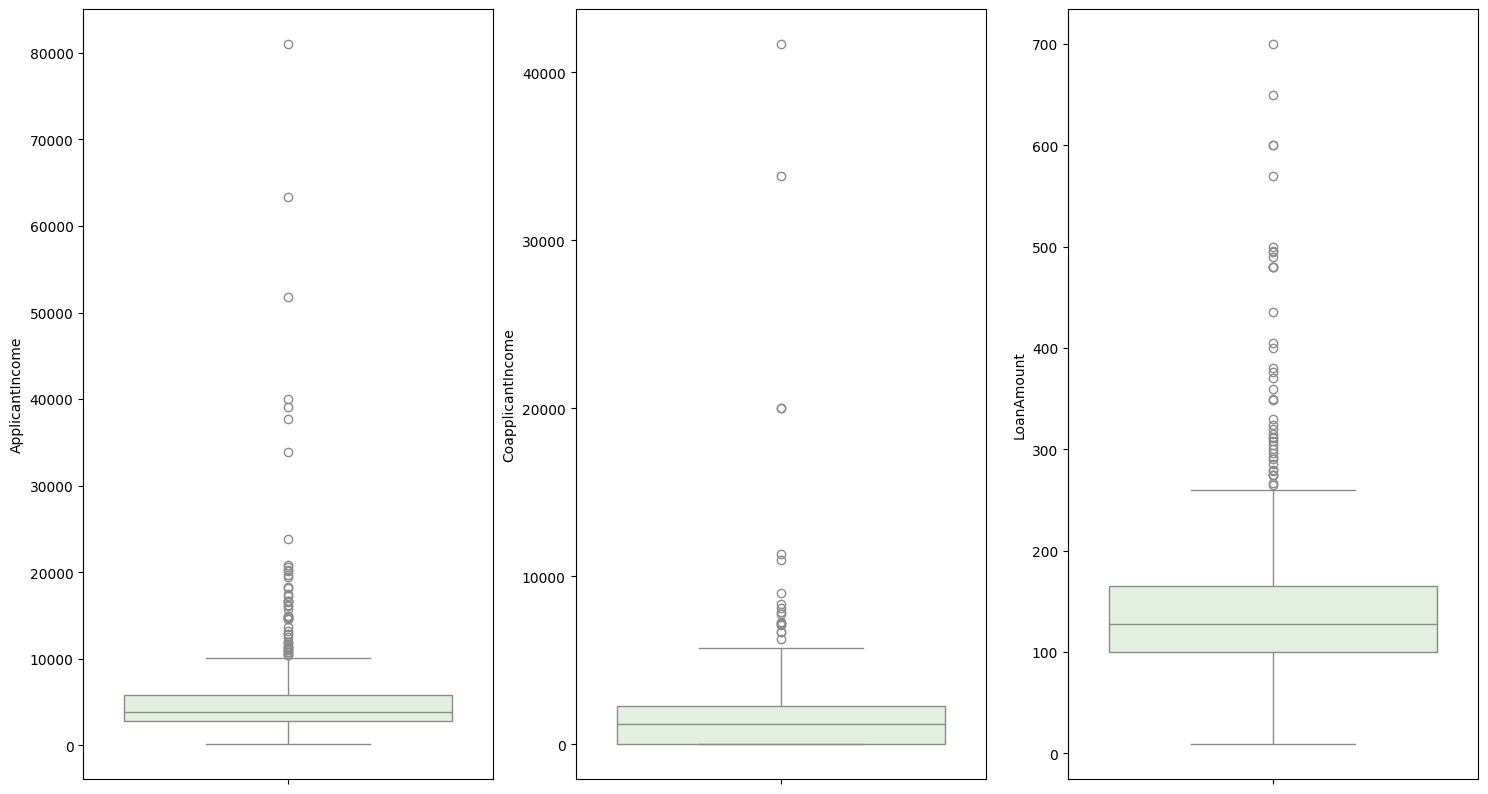

In [14]:
num_cols = [x for x in train_copy.columns if x not in object_columns]
sns.set_palette(palette="Greens")
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 10))
sns.boxplot(train_copy[num_cols[0]], ax= ax[0])
sns.boxplot(train_copy[num_cols[1]], ax = ax[1])
sns.boxplot(train_copy[num_cols[2]], ax = ax[2])



----------------------------------------------------------
### Outlier Handling
----------------------------------------------------------

In [15]:
#Identify number of outliers
outlier_columns = []
for i in num_cols:
    q1 = train_copy[i].quantile(0.25)
    q3 = train_copy[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_count = ((train[i] < lower) | (train[i] > upper)).sum()
    print(f"The number of outliers for {i} is {outlier_count}")
    if outlier_count > 0:
        outlier_columns.append(i)
    
    

The number of outliers for ApplicantIncome is 50
The number of outliers for CoapplicantIncome is 18
The number of outliers for LoanAmount is 41


In [16]:
#Locate outliers using IQR method and clip
def clean_outliers(data, i):
    q1 = train_copy[i].quantile(0.25)
    q3 = train_copy[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), 
                       data[i].clip(lower = lower, upper = upper).astype(data[i].dtype), data[i])
    return data

for i in outlier_columns:
    train_copy = clean_outliers(train_copy, i)

train_copy


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


----------------------------------------------------------
### View Data after removing outliers
----------------------------------------------------------

In [17]:
#Dataset after removing outliers
train_copy.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.091205,1419.702231,137.365635,342.410423,0.855049
std,2479.806058,1624.605892,55.779749,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,10171.000000,5743.125000,261.500000,480.000000,1.000000


------------------------------------------------------------
## Univariate Analysis
------------------------------------------------------------

### Descriptive Statistics

In [18]:
#Descriptive Statistics
desc_dic = {i: [np.round(train_copy[i].mean(), 2), np.round(train_copy[i].median(), 2), np.round(train_copy[i].std(), 2),
                np.round(train_copy[i].var(), 2), np.round(train_copy[i].std() / train_copy[i].mean(), 2), 
                np.round(train_copy[i].skew(), 2), np.round(train_copy[i].kurtosis(), 2),
                np.round(train_copy[i].max() - train_copy[i].min(), 2)] for i in num_cols}
descriptive_statistics = pd.DataFrame(desc_dic, index=['mean', 'median', 'standard deviation', 'variance', 'Co-efficient of Variation', 'Skewness', 'Kurtosis', 'Range'])
train_copy[num_cols]
descriptive_statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount
mean,4617.09,1419.70,137.37
median,3812.50,1188.50,128.00
standard deviation,2479.81,1624.61,55.78
variance,6149438.09,2639344.31,3111.38
Co-efficient of Variation,0.54,1.14,0.41
Skewness,1.04,1.01,0.68
Kurtosis,0.13,0.24,0.11
Range,10021.00,5743.12,252.50


----------------------------------------------------------
### Distributions of Numerical Features
----------------------------------------------------------

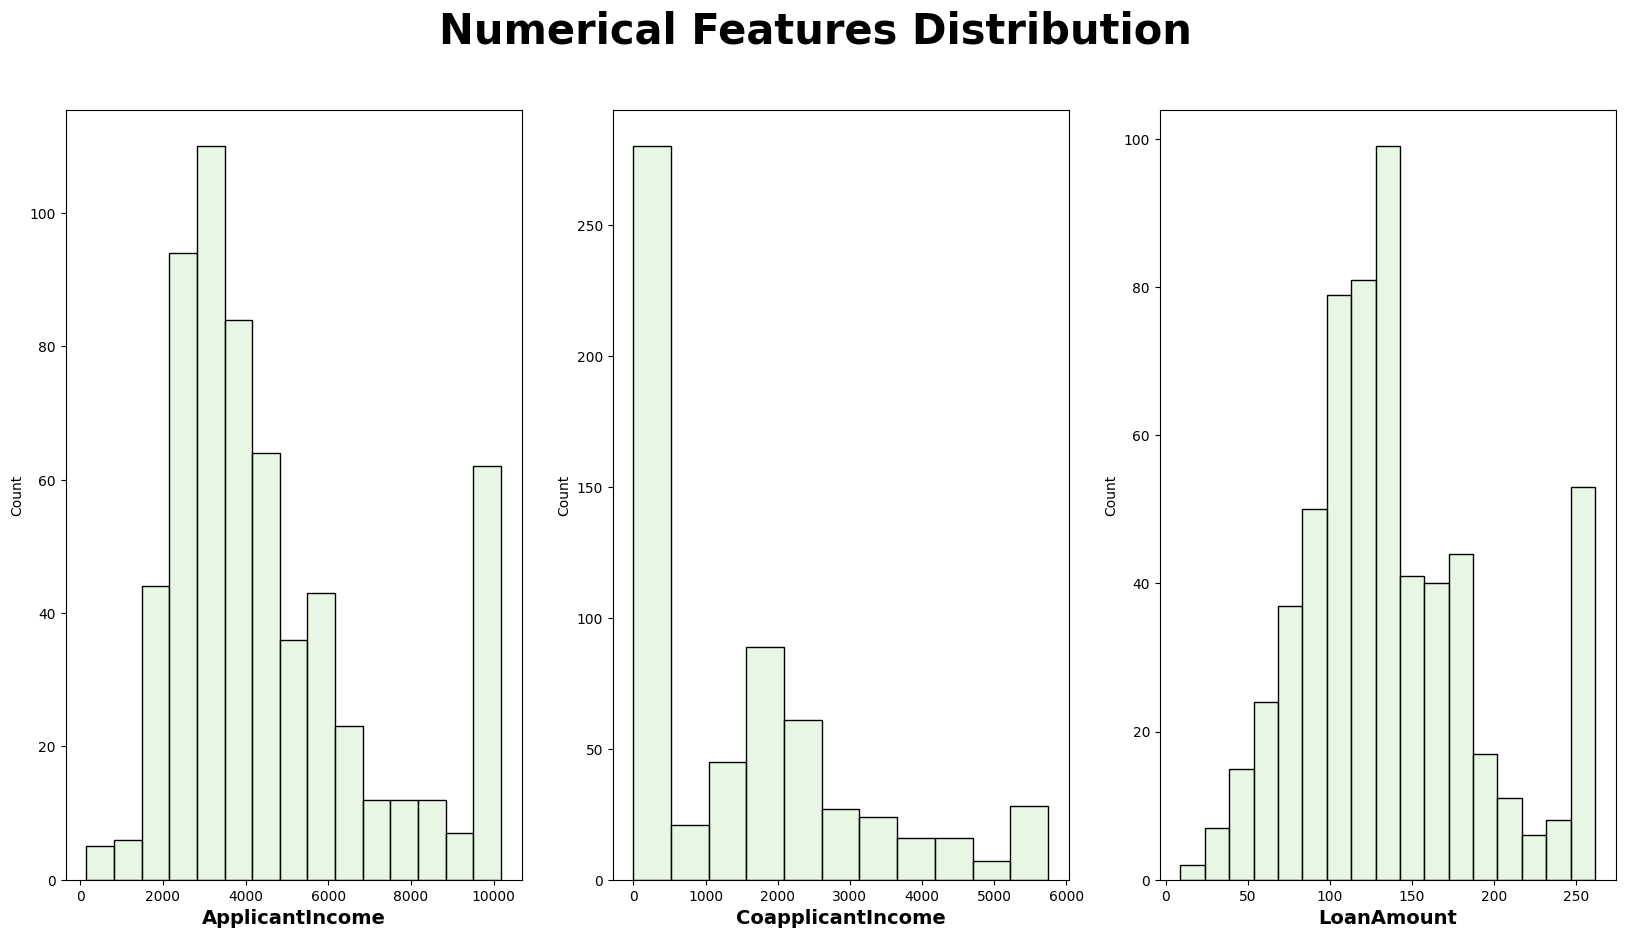

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(20, 10))
plt.suptitle('Numerical Features Distribution', size = 30, fontweight='bold')


for index, col in enumerate(num_cols):
    sns.set_palette(palette="Greens")
    ax[index].set_xlabel(col, size = 14, fontweight = 'bold')
    sns.histplot(train_copy[col], ax=ax[index])
    


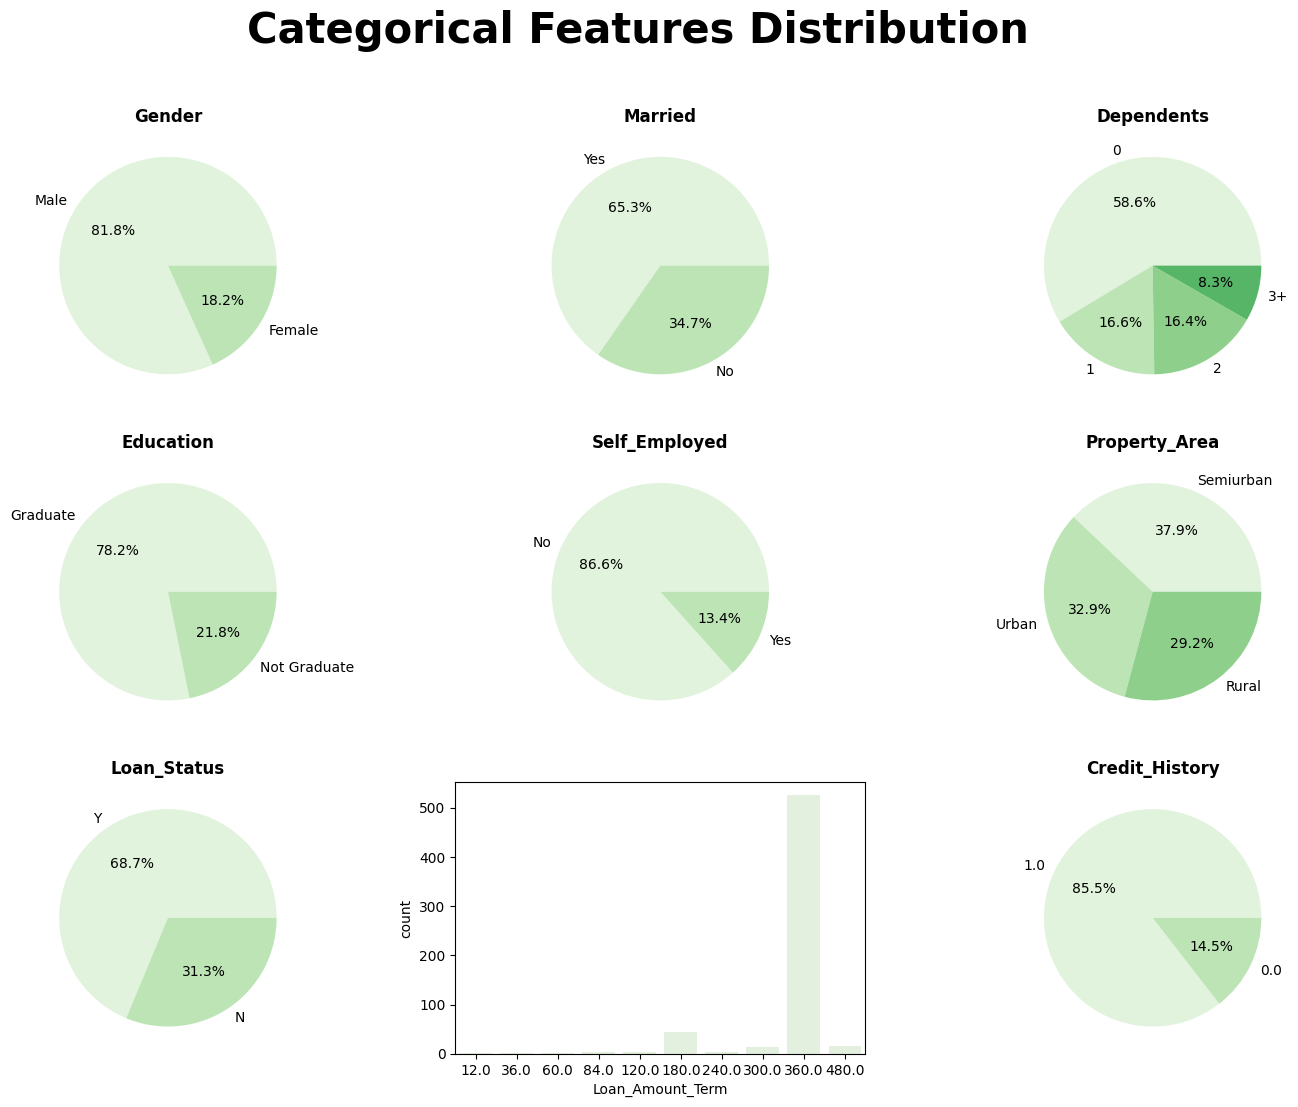

In [20]:
real_objects = object_columns[1:]
num = 0
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
plt.suptitle("Categorical Features Distribution", size = 30, fontweight='bold')
for i in range(3):
    for j in range(3):
        target = train_copy[real_objects[num]]
        if target.nunique() > 4:
            sns.barplot(data=target.value_counts(), ax=ax[i, j])
            ax[i, j].set_xlabel(real_objects[num])
        else:
            
            ax[i,j].pie(target.value_counts(), labels = target.value_counts().index, autopct = "%1.1f%%")
            ax[i, j].set_title(real_objects[num], fontsize=12, fontweight='bold')
        num += 1
        

------------------------------------------------------------
## Exploring Relationships Between Features and Target
------------------------------------------------------------

### Target Distribution

In [21]:
freq = train_copy['Loan_Status'].value_counts()
prop = train_copy['Loan_Status'].value_counts(normalize = True) * 100

count_summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
count_summary

,Count,Percentage
Loan_Status,,
Y,422,68.73
N,192,31.27


Text(0, 0.5, 'Count')

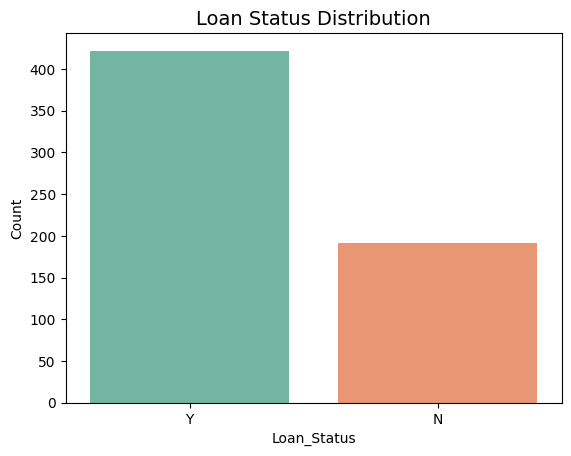

In [22]:
#Visualisation
ax = sns.countplot(x = 'Loan_Status', data = train_copy, order = freq.index, color = "teal", palette = "Set2", hue = 'Loan_Status')
plt.title("Loan Status Distribution", size = 14)
plt.xlabel("Loan_Status")
plt.ylabel("Count")




### Observations
* We notice imbalance in our target data
* In fact the number of approved home loans is more than twice the number of declined home loans.

In [23]:
train_copy['Loan_Status'] = train_copy['Loan_Status'].map({'Y': 1, 'N':0})

<Axes: >

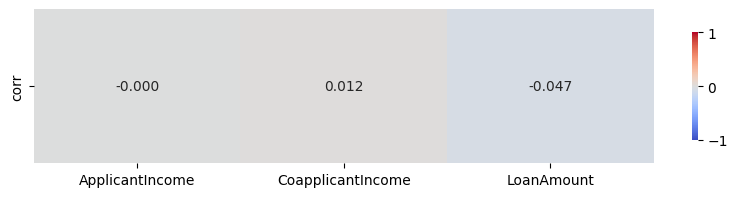

In [24]:

target_corr = train_copy[num_cols].corrwith(train_copy['Loan_Status']).to_frame("corr").T

plt.figure(figsize = (10, 2))
sns.heatmap(target_corr, annot = True, fmt = ".3f", cmap = "coolwarm", center = 0, vmin = -1, vmax = 1, 
            cbar_kws = {"orientation": "vertical", "shrink": 0.7})





### Observations
* Credit_History has the strongest correlation among our features with our target variable
* Other features have very weak correlation with our target data.
* Further investigations are required to create new features from features that have weak correlation with the target variable.

feature_corr = train_copy[num_cols].corr()

sns.heatmap(feature_corr, annot = True, fmt = ".3f", cmap = "YlGnBu")


### Observations
* We notice the absence of strong correlation between variables
* In fact the strongest correlation is given by 0.558 between  ApplicantIncome and LoanAmount which is moderate.

In [25]:
def reg_plot(data, col1, col2):
    """
    Visualise the relationship between numerical columns using regplot
    """

    """
    Params
    ----------
    data : pd.DataFrame
        Data containing numerical features
    col1 : str
        Name of the first column
    col2 : str
        Name of the second column
    """
    try:
        if col1 in data.columns and col2 in data.columns:
            corr, pvalue = stats.pearsonr(train_copy[col1], train_copy[col2])
            ax = sns.regplot(data = data, x = col1, y = col2, scatter_kws = {'alpha':0.4}, line_kws = {'color': 'red'}, color = "blue")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.set_title(f"{col1} vs {col2} \nCorrelation: {corr:.3f}, p value: {pvalue:.3f}")
            plt.show()
        else:
            raise ValueError("Columns not found in data")
    except ValueError as e:
        print(e)

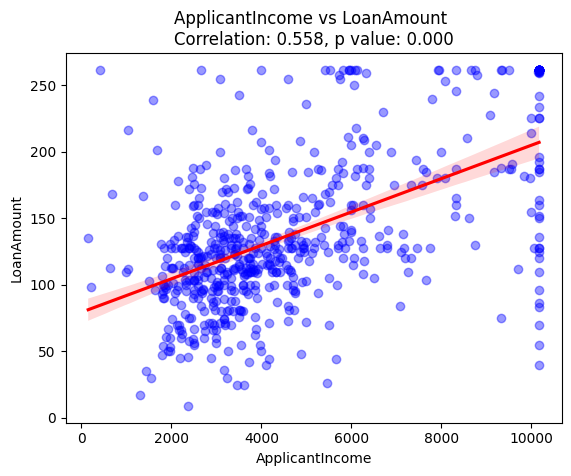

In [26]:
reg_plot(train_copy, "ApplicantIncome", "LoanAmount")

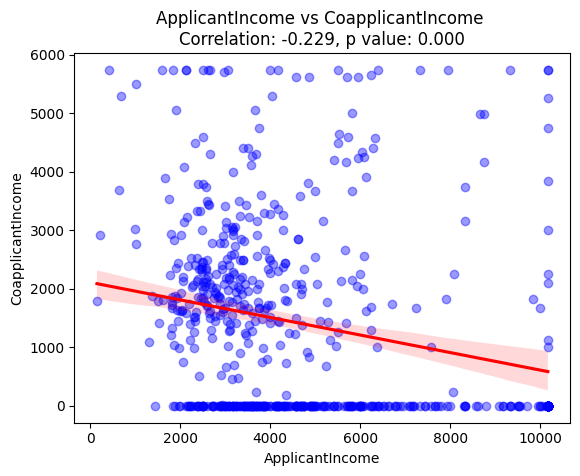

In [27]:
reg_plot(train_copy, "ApplicantIncome", "CoapplicantIncome")

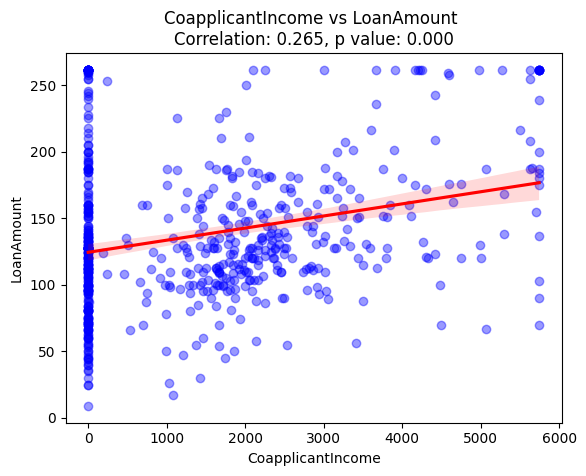

In [28]:
reg_plot(train_copy, "CoapplicantIncome", "LoanAmount")

### Observations
* There is a positive correlation between ApplicantIncome and LoanAmount which implies an increase in ApplicantIncome corresponds to an increase in LoanAmount. Furthermore our p value is less than 0.05 therefore we can conclude that our result is statistically significant.
* There is a negative correlation between ApplicantIncome and CoapplicantIncome which implies an increase in ApplicantIncome corresponds to a decrease in CoapplicantIncome. Furthermore our p value is less than 0.05 therefore we can conclude that our result is statistically significant.
* There is a positive correlation between LoanAmount and CoapplicantIncome which implies an increase in ApplicantIncome corresponds to a decrease in CoapplicantIncome. Furthermore our p value is less than 0.05 therefore we can conclude that our result is statistically significant.